# Cleaning Data

In [1]:
import networkx as nx
from networkx.algorithms import community, cluster
import json
import gzip

import collections
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import math
%matplotlib inline

In [2]:
%%time
# Reading data

file_path = "../Data/climate_top_100_anon_reply_retweet.txt"

with open(file_path) as f:
    raw = f.readlines()

f.close()

CPU times: user 52.4 ms, sys: 34.2 ms, total: 86.6 ms
Wall time: 120 ms


In [3]:
# Converting string representation to retweet/reply dictionaries

def convert(raw):
    data = []
    for line in raw:
        clean_line = json.loads(line)
        data.append(clean_line)

    retweets = {}
    replies = {}
    for row in data:
        retweets[row[0]] = row[1]
        replies[row[0]] = row[2]

    return retweets, replies

In [4]:
retweets, replies = convert(raw)

# Graphs of Retweets and Replies

## Undirected Graphs

### Core Users Only

In [5]:
def remove_noncore(data):
    for key in data:
        data[key][:] = [x for x in data[key] if x < 10000]
    return data

In [6]:
%%time
retweets_core = remove_noncore(retweets)
replies_core = remove_noncore(replies)

CPU times: user 429 ms, sys: 290 µs, total: 429 ms
Wall time: 427 ms


In [7]:
def test_core(data):
    check = True
    for vals in data.values():
        for i in vals:
            if i >= 10000:
                check = False
                
    return check

In [8]:
print(test_core(retweets_core))
print(test_core(replies_core))

True
True


#### Generating graphs

In [9]:
G_core = nx.from_dict_of_lists(retweets_core)

In [10]:
H_core = nx.from_dict_of_lists(replies_core)

In [11]:
print("Number of Users:")
print("\tRetweets:", G_core.number_of_nodes())
print("\tReplies:", H_core.number_of_nodes())

print("Number of Links:")
print("\tRetweets:", G_core.number_of_edges())
print("\tReplies:", H_core.number_of_edges())

Number of Users:
	Retweets: 4071
	Replies: 4071
Number of Links:
	Retweets: 398601
	Replies: 212938


In [12]:
degree_sequence = sorted([d for n, d in G_core.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

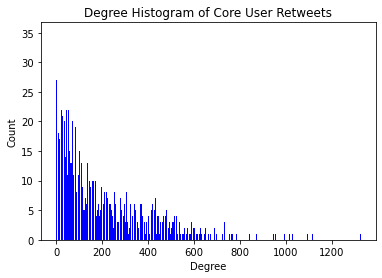

In [13]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram of Core User Retweets")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.show()

In [14]:
print(sorted(G_core.degree, key=lambda x: x[1], reverse=True)[:5])

[(377, 1325), (3, 1272), (118, 1232), (8, 1231), (91, 1141)]


#### Degree Distributions on Double Logarithm plot

In [15]:
# Function for plotting Double log graph and CCDF

def plot_ccdf(graph, title):
    
    #TODO: Need to code for in_degree and out_degree on multi_graphs
    
    degrees = sorted([d for n, d in graph.degree()], reverse=True)
    degree_counts = collections.Counter(degrees)                                                                                                 
    deg, cnt = zip(*degree_counts.items())                                                      
    
    print(type(graph))
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1) 
    plt.title(title + " (Double Logarithm)")
    
    # prep axes                                                                                                                      
    plt.xlabel('degree')                                                                                                             
    plt.xscale('log')                                                                                                                
    plt.xlim(1, max(deg))  
    
    plt.ylabel('frequency')                                                                                                          
    plt.yscale('log')                                                                                                                
    plt.ylim(1, max(cnt))                                                                                                             
                                                                                                                                         # do plot                                                                                                                        
    plt.scatter(deg, cnt, s = 50, marker='.')                                                                                                 
    
    plt.subplot(1, 2, 2)
    cs = np.cumsum(cnt)
    
    plt.title(title + " CCDF")
    
    # prep axes                                                                                                                      
    plt.xlabel('degree')                                                                                                             
    plt.xscale('log')                                                                                                                
    plt.xlim(1, max(deg))  
    
    plt.ylabel('frequency')                                                                                                          
    plt.yscale('log')                                                                                                                
    plt.ylim(1, max(cs))
    
    plt.scatter(deg, cs, s = 50, marker = '.')
                                                                                                                                 # do plot                                                                                                                         
    plt.show()

<class 'networkx.classes.graph.Graph'>


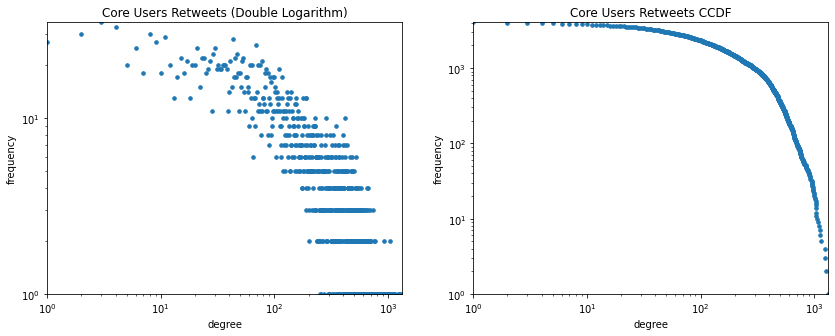

In [16]:
plot_ccdf(G_core, "Core Users Retweets")

<class 'networkx.classes.graph.Graph'>


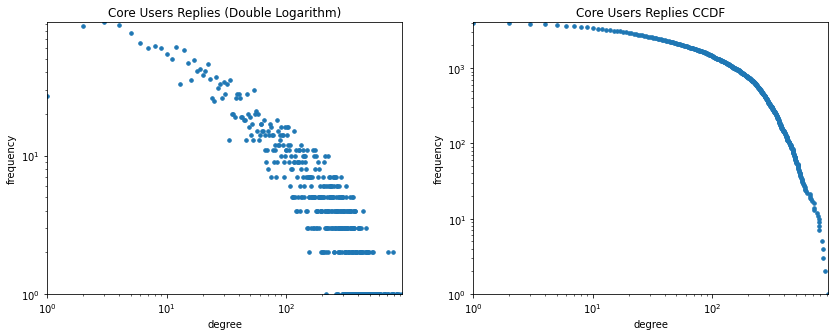

In [17]:
plot_ccdf(H_core, "Core Users Replies")

#### Clustering Coefficient

In [18]:
retweet_core_coeff = cluster.average_clustering(G_core)

In [19]:
reply_core_coeff = cluster.average_clustering(H_core)

In [20]:
print("Retweets: {:2.2%}".format(retweet_core_coeff))
print("Replies: {:2.2%}".format(reply_core_coeff))

Retweets: 29.28%
Replies: 18.97%


### Including non-core users

In [21]:
retweets, replies = convert(raw)

In [22]:
G = nx.from_dict_of_lists(retweets)

In [23]:
H = nx.from_dict_of_lists(replies)

In [24]:
print("Number of Users:")
print("\tRetweets:", G.number_of_nodes())
print("\tReplies:", H.number_of_nodes())

print("Number of Links:")
print("\tRetweets:", G.number_of_edges())
print("\tReplies:", H.number_of_edges())

Number of Users:
	Retweets: 373407
	Replies: 455354
Number of Links:
	Retweets: 1651443
	Replies: 1248175


#### Degree Distributions on Double Logarithm plot

<class 'networkx.classes.graph.Graph'>


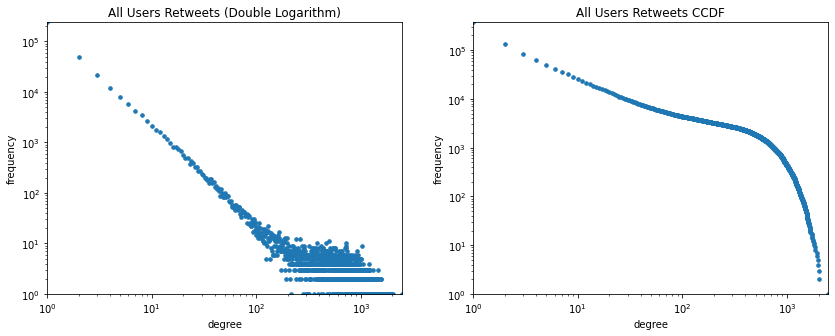

In [25]:
plot_ccdf(G, "All Users Retweets")

<class 'networkx.classes.graph.Graph'>


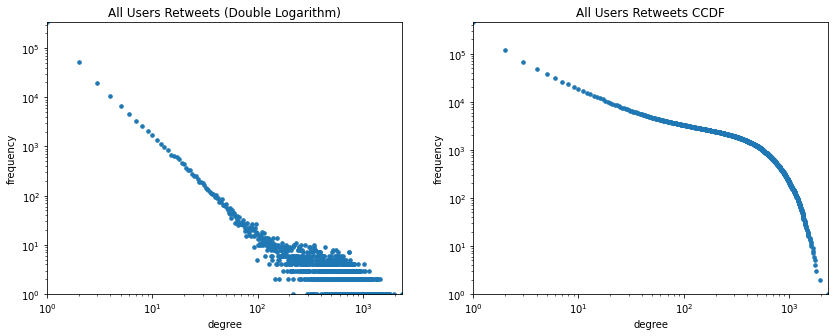

In [26]:
plot_ccdf(H, "All Users Retweets")

## Multi-Edge Undirected Graphs

In [71]:
G_core_multi = nx.from_dict_of_lists(retweets_core, create_using = nx.MultiGraph)

In [28]:
H_core_multi = nx.from_dict_of_lists(replies_core, create_using = nx.MultiGraph)

<class 'networkx.classes.multigraph.MultiGraph'>


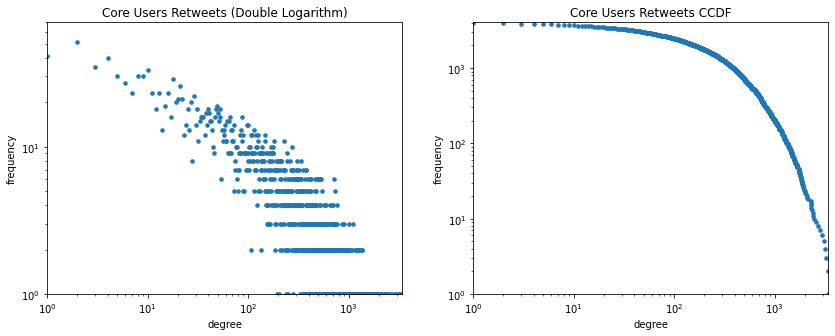

In [29]:
plot_ccdf(G_core_multi, "Core Users Retweets")

<class 'networkx.classes.multigraph.MultiGraph'>


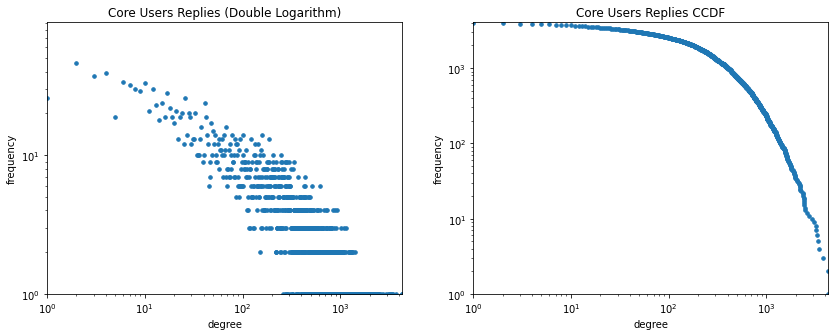

In [30]:
plot_ccdf(H_core_multi, "Core Users Replies")

In [31]:
G_multi = nx.from_dict_of_lists(retweets, create_using = nx.MultiGraph)

In [32]:
H_multi = nx.from_dict_of_lists(replies, create_using = nx.MultiGraph)

<class 'networkx.classes.multigraph.MultiGraph'>


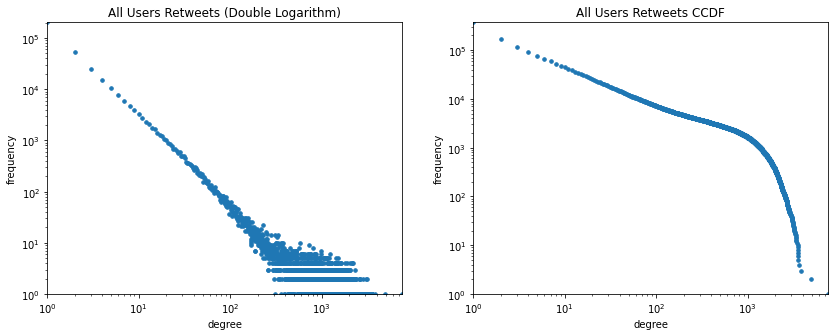

In [33]:
plot_ccdf(G_multi, "All Users Retweets")

<class 'networkx.classes.multigraph.MultiGraph'>


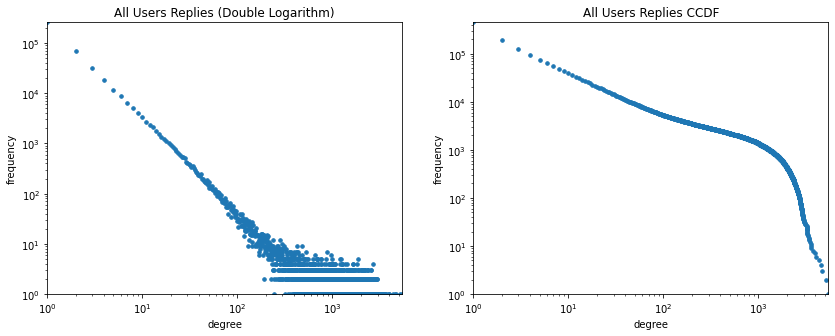

In [34]:
plot_ccdf(H_multi, "All Users Replies")

## Multi-Edge Directed Graphs

In [65]:
G_core_multi_di = nx.from_dict_of_lists(retweets_core, create_using = nx.MultiDiGraph)

In [345]:
H_core_multi_di = nx.from_dict_of_lists(replies_core, create_using = nx.MultiDiGraph)

<class 'networkx.classes.multidigraph.MultiDiGraph'>


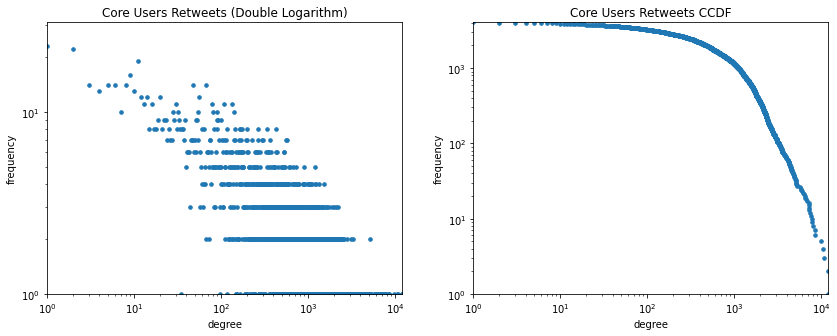

In [37]:
plot_ccdf(G_core_multi_di, "Core Users Retweets")

<class 'networkx.classes.multidigraph.MultiDiGraph'>


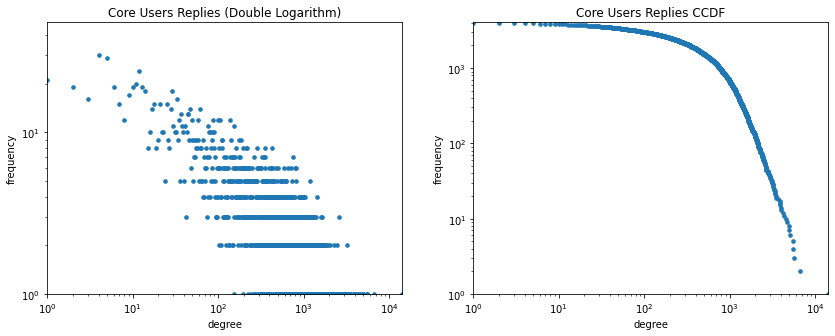

In [38]:
plot_ccdf(H_core_multi_di, "Core Users Replies")

In [39]:
G_multi_di = nx.from_dict_of_lists(retweets, create_using = nx.MultiDiGraph)

In [40]:
H_multi_di = nx.from_dict_of_lists(replies, create_using = nx.MultiDiGraph)

<class 'networkx.classes.multidigraph.MultiDiGraph'>


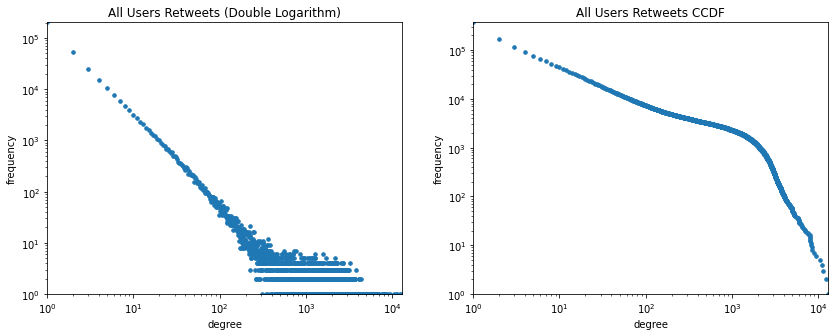

In [41]:
plot_ccdf(G_multi_di, "All Users Retweets")

<class 'networkx.classes.multidigraph.MultiDiGraph'>


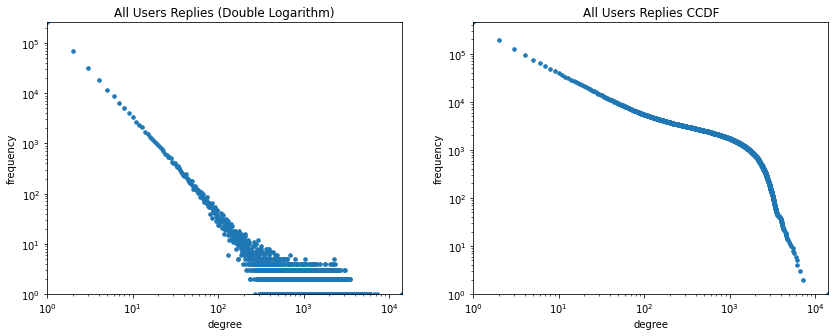

In [42]:
plot_ccdf(H_multi_di, "All Users Replies")

## Interesting Summaries

In [43]:
# Proportion of core user edges to core and non-core user edges
print(G_core.number_of_edges() / G.number_of_edges())
print(H_core.number_of_edges() / H.number_of_edges())

0.24136527872896613
0.17059947523384142


# Temporal Data Analysis

In [11]:
import ast
import itertools
from datetime import datetime, timedelta

In [12]:
%%time

file_path = "../Data/"

with gzip.open(file_path + "climate_top_100_anon_reply_retweet_wtimes.txt.gz") as f:
    raw_time = f.readlines()
    
f.close()

CPU times: user 2.09 s, sys: 180 ms, total: 2.27 s
Wall time: 2.27 s


In [13]:
def convert_time(raw):
    data = []
    for line in raw:
        line = line.decode('UTF-8')
        clean_line = ast.literal_eval(line)
        data.append(clean_line)
    
    retweets = {}
    replies = {}
    for row in data:
        retweets[row[0]] = row[1]
        replies[row[0]] = row[2]

    return retweets, replies

In [14]:
%%time
retweets_time, replies_time = convert_time(raw_time)

CPU times: user 3min 19s, sys: 1.65 s, total: 3min 21s
Wall time: 3min 21s


In [15]:
def assign_time(data):
    for row in data:
        for i, user in enumerate(data[row]):
            data[row][i] = list(user)
            data[row][i][0] = datetime.strptime(data[row][i][0], "%a %b %d %H:%M:%S %z %Y")

In [16]:
def get_dates(data):
    dates = []
    for user in data:
        for time in data[user]:
            dates.append(time[0])
    return dates

In [17]:
def remove_noncore(data):
    for key in data:
        data[key][:] = [x for x in data[key] if x[1] < 10000]

In [18]:
%%time
assign_time(retweets_time)
assign_time(replies_time)

CPU times: user 1min 50s, sys: 384 ms, total: 1min 51s
Wall time: 1min 51s


In [11]:
retweets_dates = get_dates(retweets_time)
replies_dates = get_dates(replies_time)

In [19]:
def plot_time_histogram(data):
    min_date = data[0]
    max_date = data[-1]
    length = (max_date - min_date).days + 1
    plt.hist(data, bins=length)
    plt.show()

Plotting simple time histograms for retweets and replies

## Retweets

In [13]:
retweets_dates.sort()

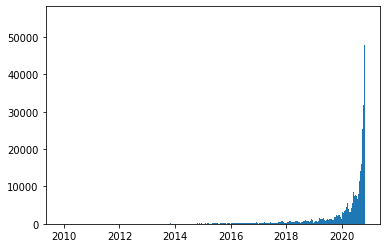

In [14]:
plot_time_histogram(retweets_dates)

In [238]:
counts_retweets = np.arange(0, len(retweets_dates))
counts_replies = np.arange(0, len(replies_dates))

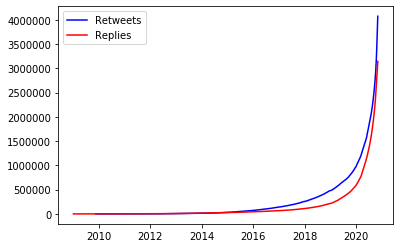

In [73]:
fig, ax = plt.subplots()

ax.plot(retweets_dates, counts_retweets, 'b', label = 'Retweets')
ax.plot(replies_dates, counts_replies, 'r', label = 'Replies')
ax.legend(loc = 'upper left')
plt.show()

In [46]:
window_min = max_date - timedelta(days = 14)
length_2weeks = (max_date - window_min).days + 1

In [48]:
retweets_window = []
for date in retweets_dates:
    if date >= window_min:
        retweets_window.append(date)

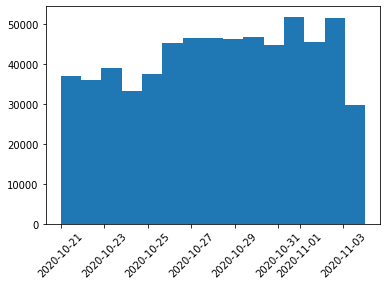

In [55]:
plt.hist(retweets_window, bins = length_2weeks)
plt.xticks(rotation=45)
plt.show()

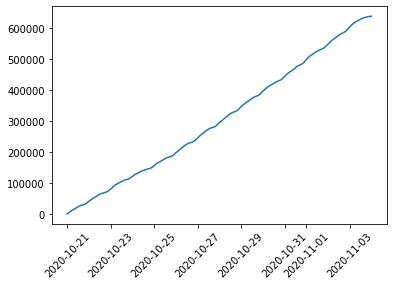

In [63]:
counts = np.arange(0, len(retweets_window))
plt.plot(retweets_window, counts)
plt.xticks(rotation=45)
plt.show()

In [80]:
type(retweets_time)

dict

In [75]:
retweets_dates = get_dates(retweets_time)

In [76]:
retweets_dates[0]

datetime.datetime(2020, 11, 3, 0, 13, 20, tzinfo=datetime.timezone.utc)

In [77]:
min_date = retweets_dates[0]
max_date = retweets_dates[-1]
window_min = max_date - timedelta(days = 14)
length_2weeks = (max_date - window_min).days + 1
retweets_window = []
for date in retweets_dates:
    if date >= window_min:
        retweets_window.append(date)

In [ ]:
retweets_2weeks = {}
for key, user in retweets_dates.items():
    for retweet in user:
        if retweet[0] in retweets_window:
            retweets_2weeks[key].remove(retweet)

## Replies

In [15]:
replies_dates.sort()

In [56]:
min_date = replies_dates[0]
max_date = replies_dates[-1]
length = (max_date - min_date).days + 1

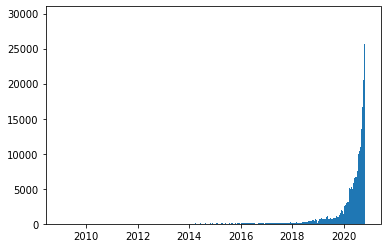

In [18]:
plt.hist(replies_dates, bins=length)
plt.show()

In [57]:
window_min = max_date - timedelta(days = 14)
length_2weeks = (max_date - window_min).days + 1

In [58]:
replies_window = []
for date in replies_dates:
    if date >= window_min:
        replies_window.append(date)

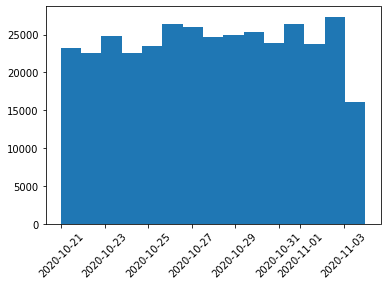

In [59]:
plt.hist(replies_window, bins = length_2weeks)
plt.xticks(rotation=45)
plt.show()

### Remove noncore

In [35]:
def remove_noncore(data):
    for key in data:
        data[key][:] = [x for x in data[key] if x[1] < 10000]

In [36]:
remove_noncore(retweets_time)
remove_noncore(replies_time)

In [33]:
def test_core(data):
    check = True
    for vals in data.values():
        for i in vals:
            if i[1] >= 10000:
                check = False
                
    return check

In [34]:
print(test_core(retweets_time))
print(test_core(replies_time))

True
True


In [108]:
retweets_core = get_dates(retweets_time)
replies_core = get_dates(replies_time)

In [29]:
retweets_core.sort()
replies_core.sort()

In [109]:
max(retweets_core)

datetime.datetime(2020, 11, 3, 23, 52, 57, tzinfo=datetime.timezone.utc)

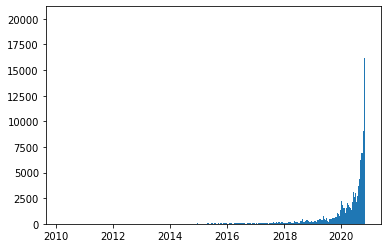

In [24]:
plot_time_histogram(retweets_core)

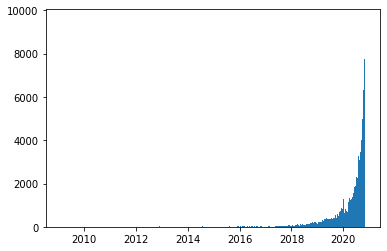

In [25]:
plot_time_histogram(replies_core)

Plotting the number of unique connections each day by extracting the most recent connection of two users

This could be further extended to percolation theory

In [102]:
def reformat(data):
    """
    Restructuring the data from dict {user: [(datetime, user), ...]} to
    new_dict {(user, user): [datetime, datetime, ...]}
    
    Dictionary key will be a unique tuple of (user1, user2)
    
    Datetime is ordered descending
    """
    
    new_dict = {}
    
    for k, v in data.items():
        
        for time in v:
            
            # Generating tuples
            
            if k < time[1]:
                key = (k, time[1])
            else:
                key = (time[1], k)
            
            # Adding times to dictionary
            
            if key not in new_dict:
                new_dict[key] = [time[0]]
            else:
                new_dict[key].append(time[0])
    
    for key in new_dict:
        
        new_dict[key].sort(reverse = True)
    
    return new_dict

In [49]:
subset = {}
for k, v in retweets_time.items():
    subset[k] = v[:5]

In [52]:
reformatted_subset = reformat(subset)

In [103]:
retweets_core_ref = reformat(retweets_time)
replies_core_ref = reformat(replies_time)

In [203]:
times = {}
for k, v in retweets_core_ref.items():
    if v[0].date() in times:
        times[v[0].date()] += 1
    else:
        times[v[0].date()] = 1

sorted_times = []
for k, v in times.items():
    sorted_times.append((k, v))

In [204]:
sorted_times.sort()

In [526]:
dates = []
counts = []
for i in sorted_times:
    dates.append(i[0])
    counts.append(i[1])

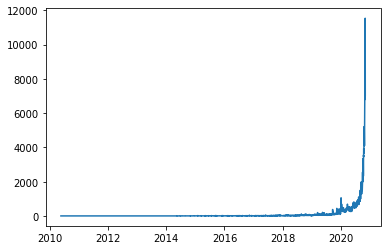

In [527]:
plt.plot(dates, counts)
plt.show()

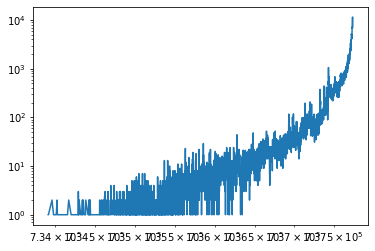

In [533]:
plt.plot(dates, counts)

plt.xscale('log')
plt.xticks(rotation=45)

plt.yscale('log')

plt.show()

In [188]:
for i, row in enumerate(sorted_times):
    sorted_times[:] = [x for x in sorted_times if x[0] >= datetime(2018,1,1).date()]

In [208]:
i = sorted_times[0][0]
filled_times = []

for row in sorted_times:
    if i == row[0]:
        filled_times.append(row)
        i += timedelta(days = 1)
    else:
        filled_times.append((i, 0))
        i += timedelta(days = 1)

In [169]:
dates = []
counts = []
for i in sorted_times:
    dates.append(i[0])
    counts.append(i[1])

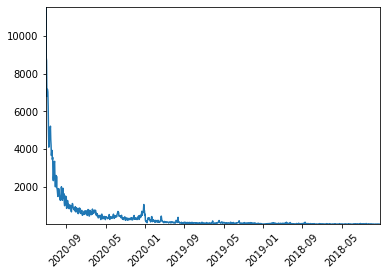

In [179]:
plt.plot(dates, counts)
plt.xticks(rotation = 45)
plt.axis([max(dates), min(dates), min(counts), max(counts)])
plt.show()

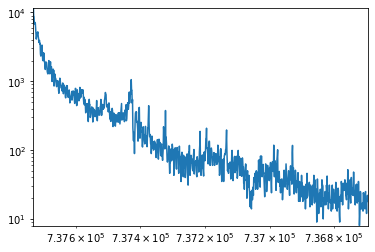

In [181]:
plt.plot(dates, counts)
plt.xticks(rotation = 45)
plt.axis([max(dates), min(dates), min(counts), max(counts)])

plt.xscale('log')
plt.yscale('log')

plt.show()

## Time Series by Community

In [23]:
import pandas as pd

In [24]:
nodes = pd.read_csv('node_degree.csv', index_col = 'User')

In [25]:
nodes

,Retweet Degree,Reply Degree,Retweet Community,Reply Community
User,,,,
377,1325,833,0,1
3,1270,773,0,0
118,1232,535,0,0
8,1229,842,0,0
91,1139,655,0,0
...,...,...,...,...
3566,1,5,2,1
3888,1,1,0,0
3932,1,1,0,1


In [21]:
def sort_community(data, pd_col):
    """
    Splitting data into separate entries in dict with key as the community
    """
    communities = {}
    for user in data:
        try:
            comm = nodes.loc[user][pd_col]
        except KeyError:
            continue
        dates = []
        for date in data[user]:
            dates.append(date)
        if comm in communities:
            communities[comm].extend(dates)
        else:
            communities[comm] = dates
            
    for i in communities:
        communities[i].sort()
        
    return communities

In [37]:
retweets_comm = sort_community(retweets_time, 'Retweet Community')

In [38]:
replies_comm = sort_community(replies_time, 'Retweet Community')

In [28]:
def plot_window(data, window, title):
    plt.figure(figsize = (12, 8))
    for i in sorted(data):
        if i < 3:
            dates_counts = {}
            for date in data[i]:
                if date.date() >= window:
                    if date.date() in dates_counts:
                        dates_counts[date.date()] += 1
                    else:
                        dates_counts[date.date()] = 1
            plt.plot(list(dates_counts.keys()), list(dates_counts.values()), label = 'Community ' + str(i))
        
    plt.legend(loc = 'upper left', prop = {'size': 16})
    plt.title(title)
    plt.xticks(rotation = 45)
    
    plt.show()

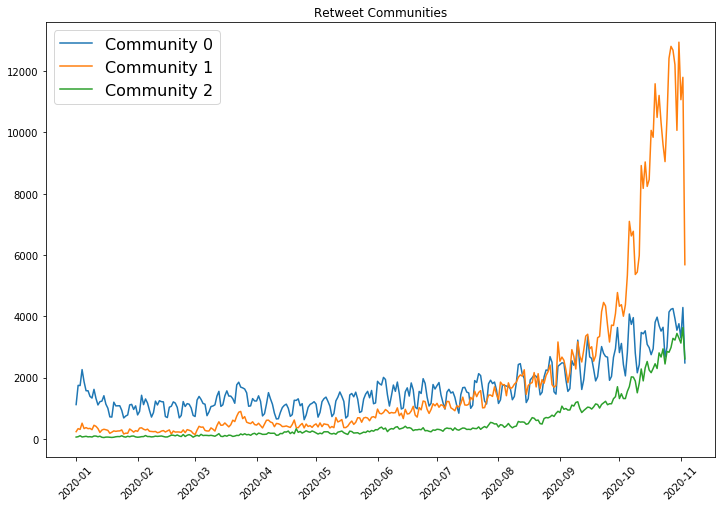

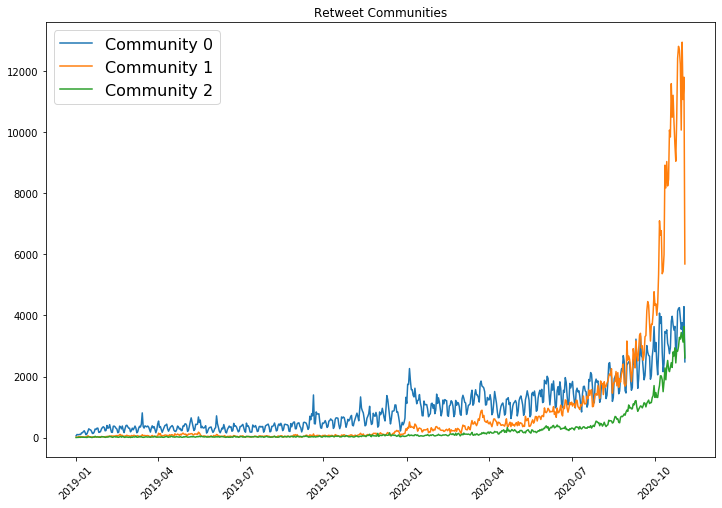

In [322]:
plot_window(retweets_comm, datetime(2020, 1, 1).date(), "Retweet Communities")
plot_window(retweets_comm, datetime(2019, 1, 1).date(), "Retweet Communities")

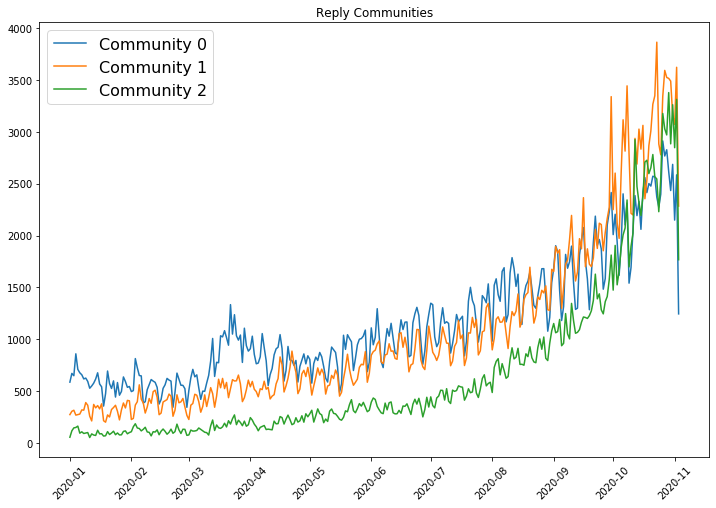

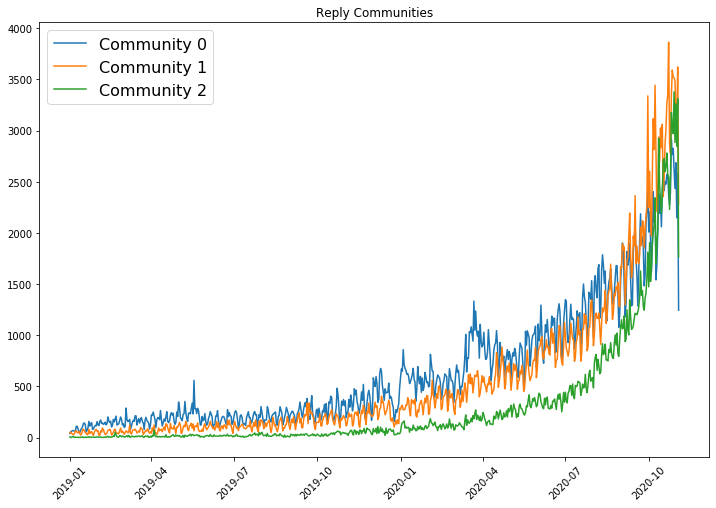

In [323]:
plot_window(replies_comm, datetime(2020, 1, 1).date(), "Reply Communities")
plot_window(replies_comm, datetime(2019, 1, 1).date(), "Reply Communities")

Plotting a time-series of users in each reply community to whom they reply to in the retweet community

/home/allan/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


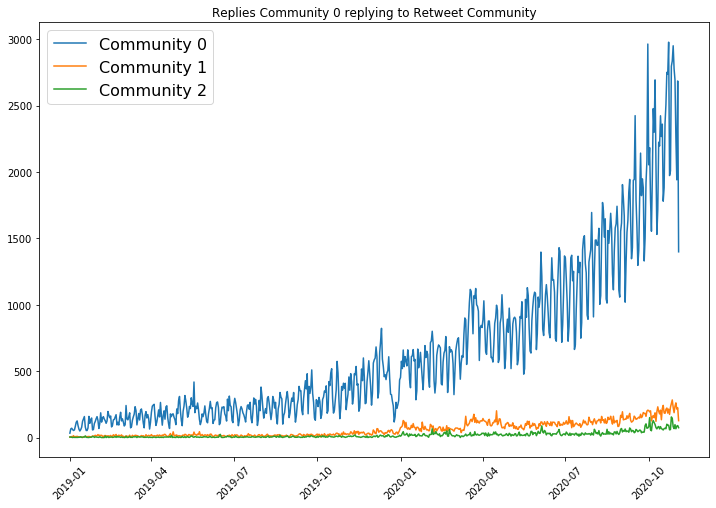

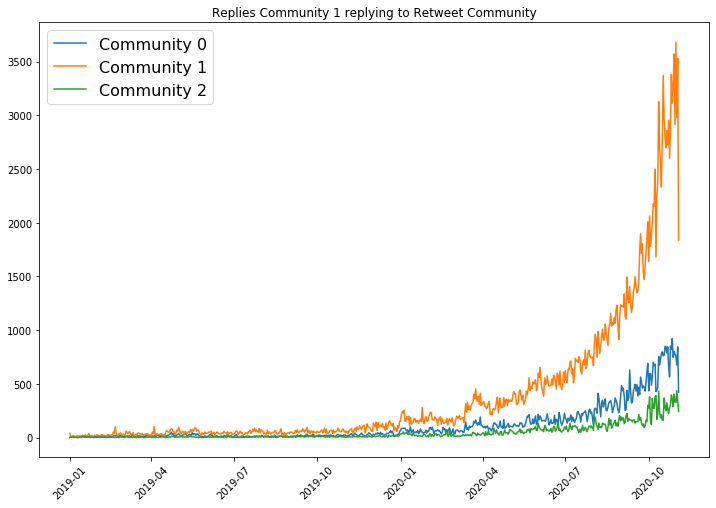

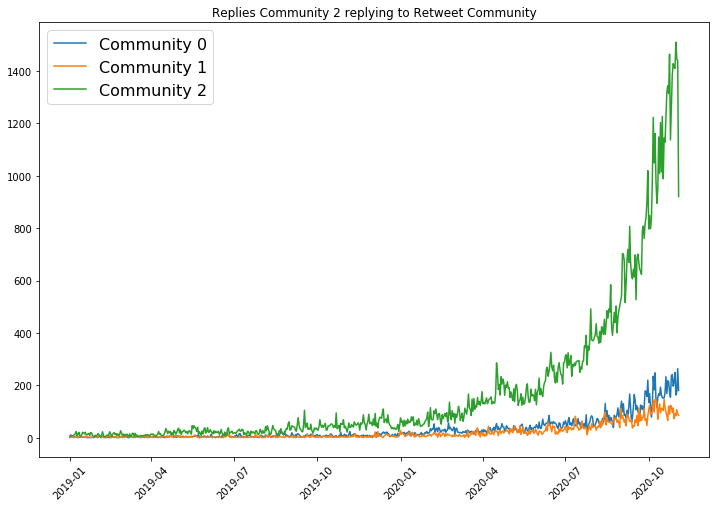

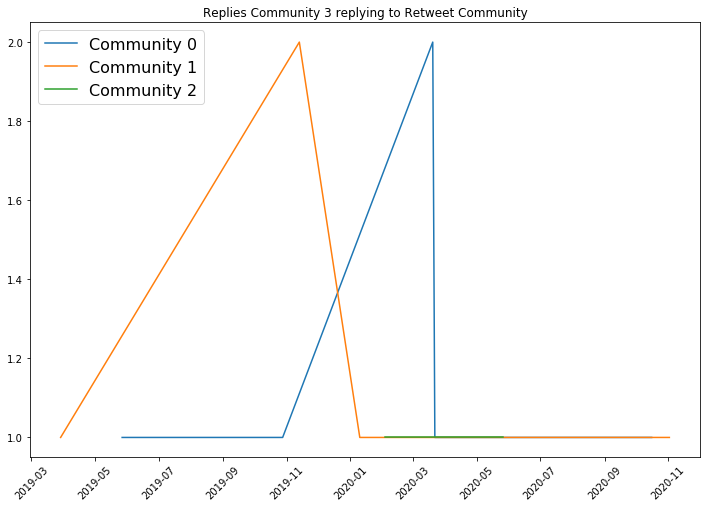

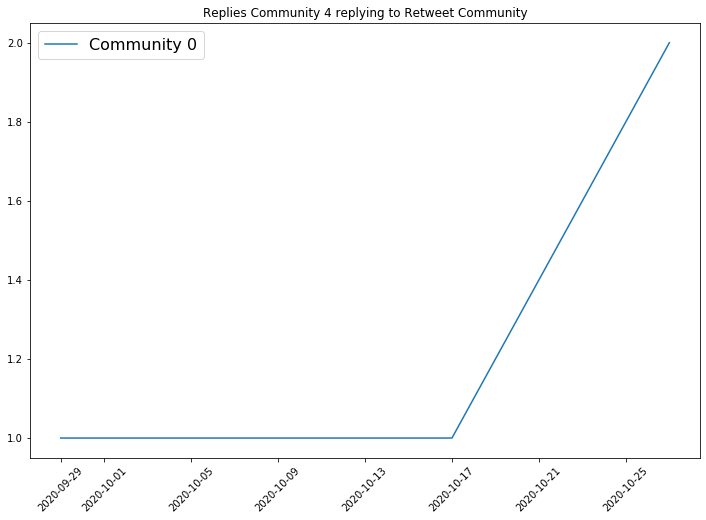

In [40]:
for i in sorted(replies_comm):
    replies_split = {}
    for date in replies_comm[i]:
        try:
            comm = nodes.loc[date[1]]['Retweet Community']
        except KeyError:
            continue
        if comm in replies_split:
            replies_split[comm].append(date[0])
        else:
            replies_split[comm] = [date[0]]
    

    plot_window(replies_split, datetime(2019,1,1).date(), 'Replies Community ' + str(i) + ' replying to Retweet Community')

Plotting time series of users in replies community to whom they reply to in the reply community

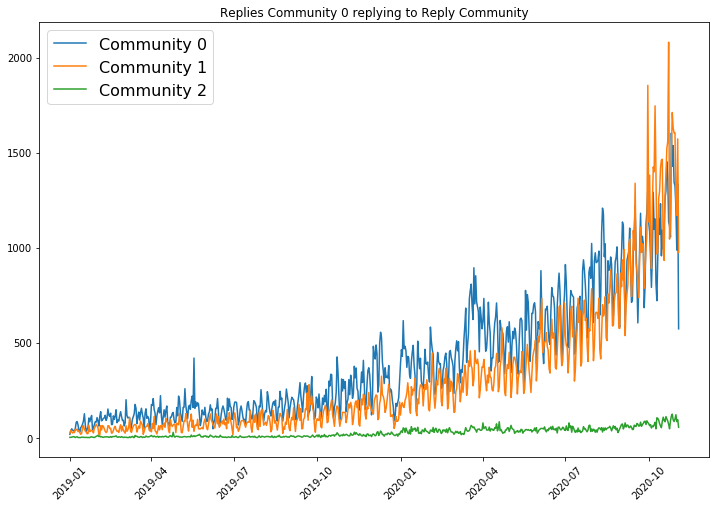

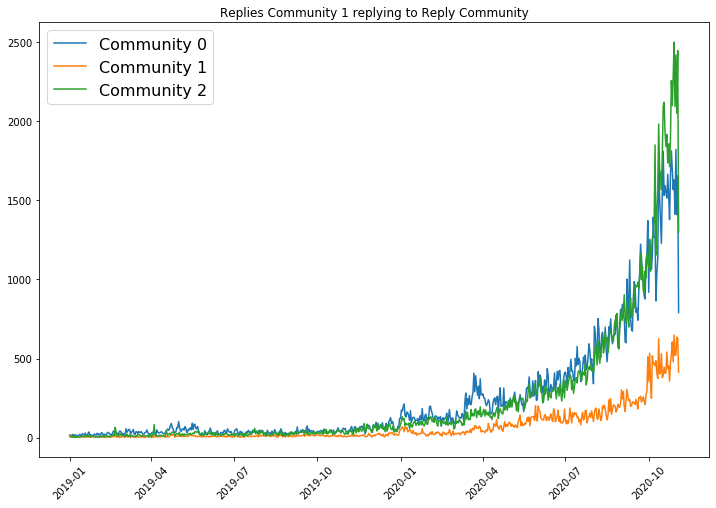

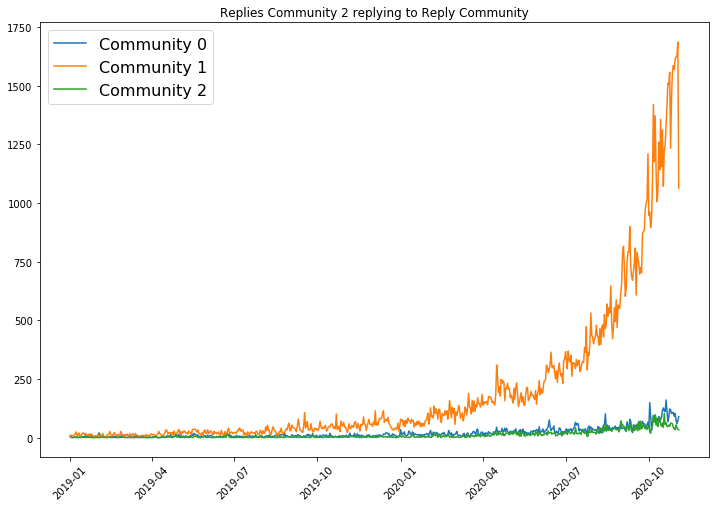

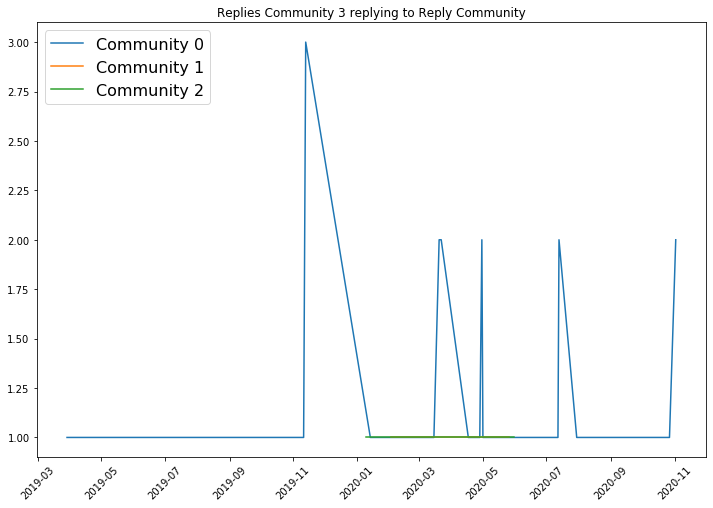

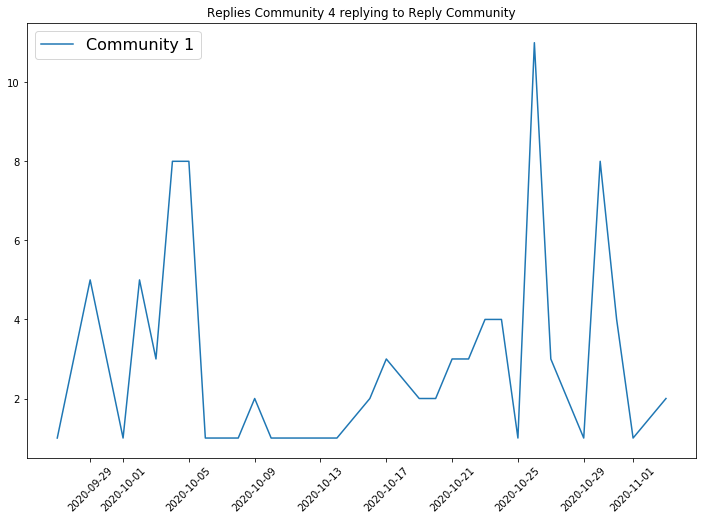

In [541]:
for i in sorted(replies_comm):
    replies_split = {}
    for date in replies_comm[i]:
        try:
            comm = nodes.loc[date[1]]['Reply Community']
        except KeyError:
            continue
        if comm in replies_split:
            replies_split[comm].append(date[0])
        else:
            replies_split[comm] = [date[0]]
    

    plot_window(replies_split, datetime(2019,1,1).date(), 'Replies Community ' + str(i) + ' replying to Reply Community')

Plotting a time-series of users in each retweet community to whom they retweet to in the reply community

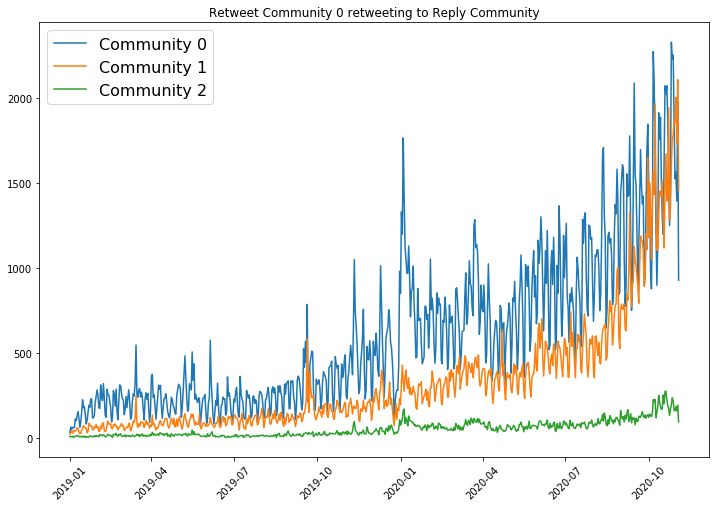

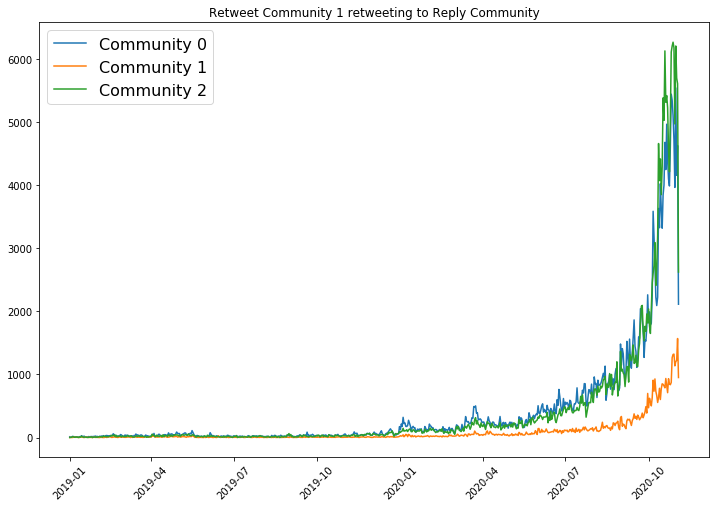

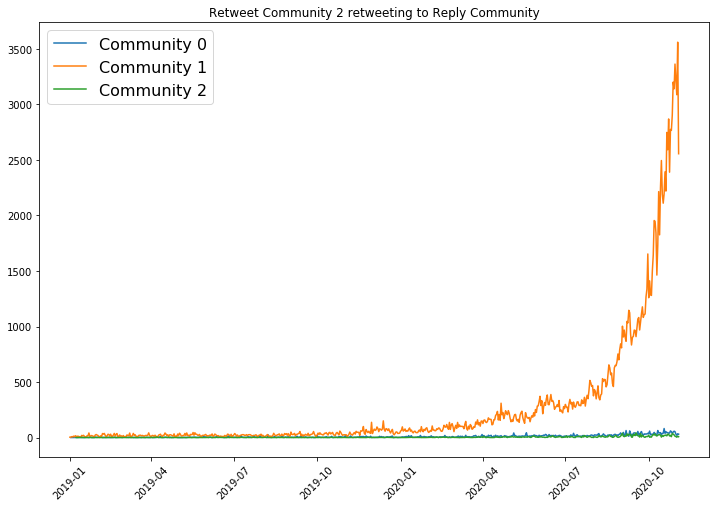

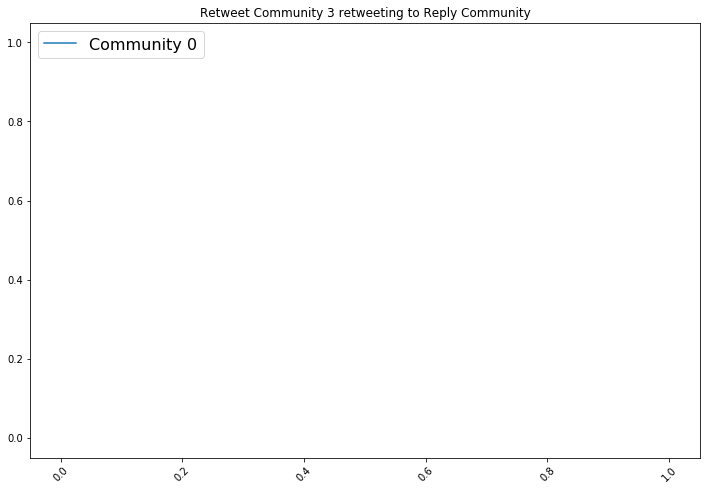

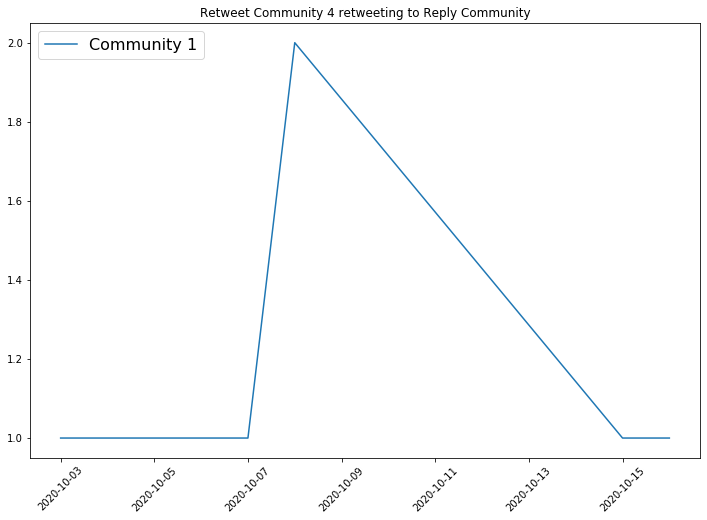

In [42]:
for i in sorted(retweets_comm):
    replies_split = {}
    for date in retweets_comm[i]:
        try:
            comm = nodes.loc[date[1]]['Reply Community']
        except KeyError:
            continue
        if comm in replies_split:
            replies_split[comm].append(date[0])
        else:
            replies_split[comm] = [date[0]]
    

    plot_window(replies_split, datetime(2019,1,1).date(), 'Retweet Community ' + str(i) + ' retweeting to Reply Community')

Plotting a time-series of users in each retweet community to whom they retweet to in the retweet community

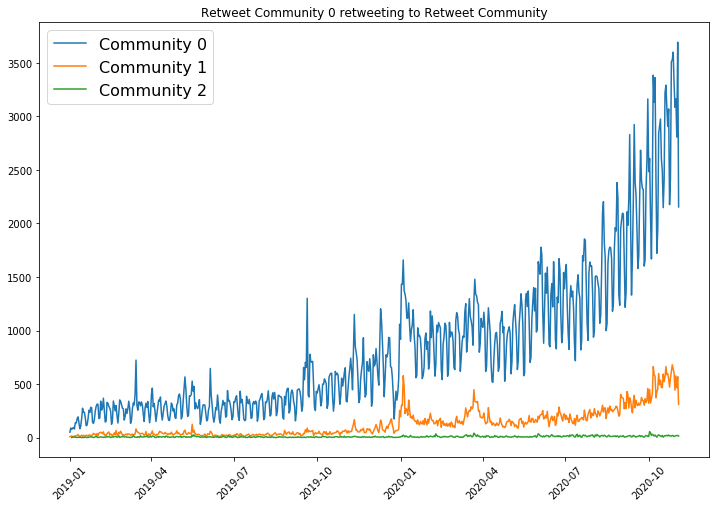

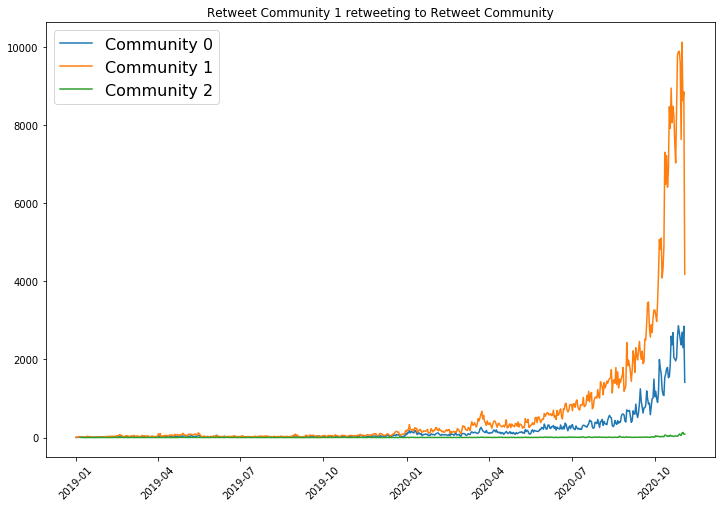

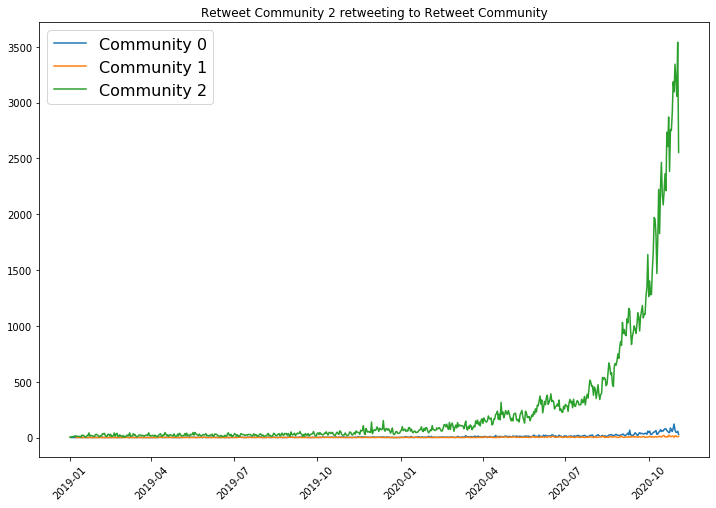

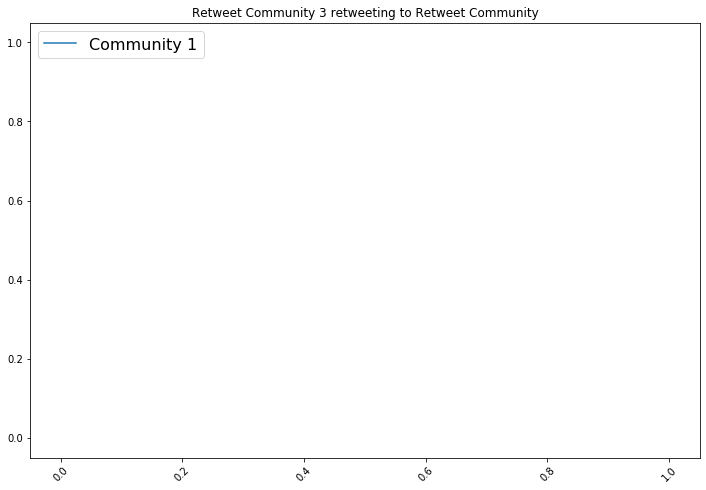

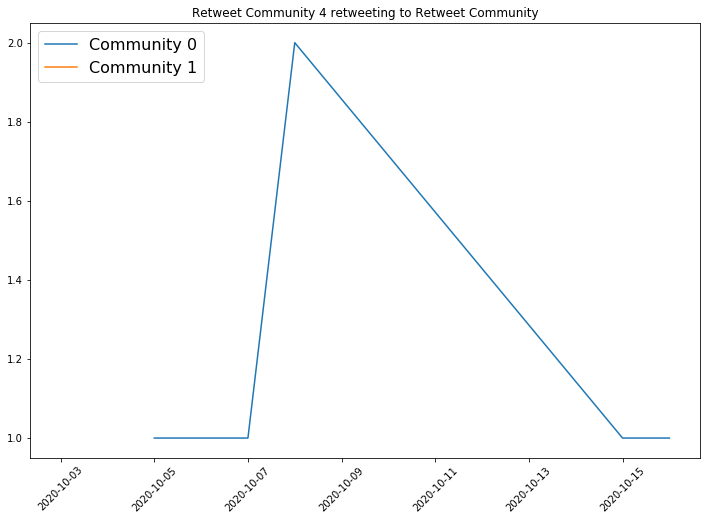

In [44]:
for i in sorted(retweets_comm):
    replies_split = {}
    for date in retweets_comm[i]:
        try:
            comm = nodes.loc[date[1]]['Retweet Community']
        except KeyError:
            continue
        if comm in replies_split:
            replies_split[comm].append(date[0])
        else:
            replies_split[comm] = [date[0]]
    

    plot_window(replies_split, datetime(2019,1,1).date(), 'Retweet Community ' + str(i) + ' retweeting to Retweet Community')

## In-Degree and Out-Degree

In [442]:
def plot_degree_dist(degrees, title):
    
    degree_counts = Counter(dict(degrees).values())                                                                                                 
    x, y = zip(*degree_counts.items())                                                    

    plt.title(title)
    
    # prep axes                                                                                                                      
    plt.xlabel('degree')                                                                                                             
    plt.xscale('log')                                                                                                                
    plt.xlim(1, max(x))  
    
    plt.ylabel('frequency')                                                                                                          
    plt.yscale('log')                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                         # do plot                                                                                                                        
    plt.scatter(x, y, marker='.')        
    
    plt.show()

In [348]:
from collections import Counter
from operator import itemgetter

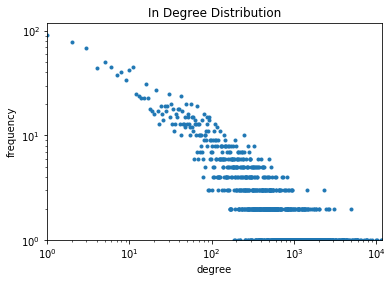

In [409]:
degrees = G_core_multi_di.in_degree()
plot_degree_dist(degrees, "In Degree")

In [ ]:
in_degrees = [graph.in_degree(n) for n in graph.nodes() 
                if n in nodes.index and nodes.loc[n]['Retweet Community'] == i]
out_degrees = [graph.out_degree(n) for n in graph.nodes()
                if n in nodes.index and nodes.loc[n]['Retweet Community'] == i]
degrees = [graph.degree(n) for n in graph.nodes()
            if n in nodes.index and nodes.loc[n]['Retweet Community'] == i]

In [514]:
def fill_degree_vals(graph, pd_col):
    nodes[pd_col + ' In Degree'] = np.nan
    nodes[pd_col + ' Out Degree'] = np.nan
    nodes[pd_col + ' Degree'] = np.nan
    
    for n in graph.nodes():
        if n in nodes.index:
            nodes[pd_col + ' In Degree'][n] = graph.in_degree(n)
            nodes[pd_col + ' Out Degree'][n] = graph.out_degree(n)
            nodes[pd_col + ' Degree'][n] = graph.degree(n)


In [515]:
fill_degree_vals(G_core_multi_di, 'Multi Retweet')
fill_degree_vals(H_core_multi_di, 'Multi Reply')

/home/allan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/allan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/allan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [517]:
nodes = nodes.astype(int)

In [519]:
nodes.to_csv("node_degree_multi.csv", 
           index=True)

In [494]:
G_core_multi_di.in_degree(0)

3882

In [520]:
def plot_degree_hists(graph):

    for i in range(3):
        
        in_degrees = [graph.in_degree(n) for n in graph.nodes() 
                      if n in nodes.index and nodes.loc[n]['Retweet Community'] == i]
        out_degrees = [graph.out_degree(n) for n in graph.nodes()
                       if n in nodes.index and nodes.loc[n]['Retweet Community'] == i]
        degrees = [graph.degree(n) for n in graph.nodes()
                   if n in nodes.index and nodes.loc[n]['Retweet Community'] == i]
        
        
        fig, axs = plt.subplots(1, 3, figsize = (12, 4))
        
        fig.suptitle("Community " + str(i))
        
        axs[0].hist(in_degrees)
        axs[0].title.set_text("In Degree")
        
        axs[1].hist(out_degrees)
        axs[1].title.set_text("Out Degree")
        
        axs[2].hist(degrees)
        axs[2].title.set_text("Degree")
        
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        for ax in axs.flat:
            ax.set(xlabel='Degrees', ylabel='Frequency')
    
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()
        
        plt.show()    

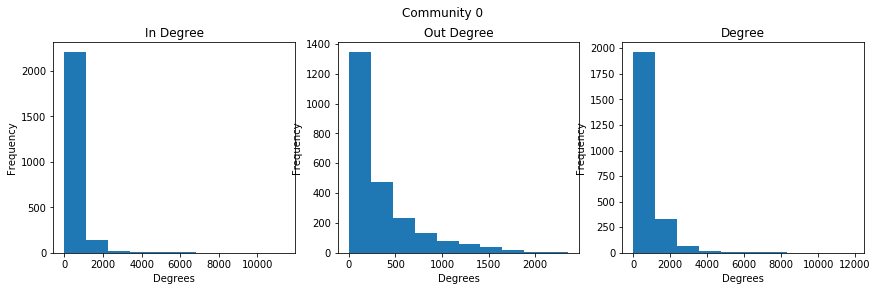

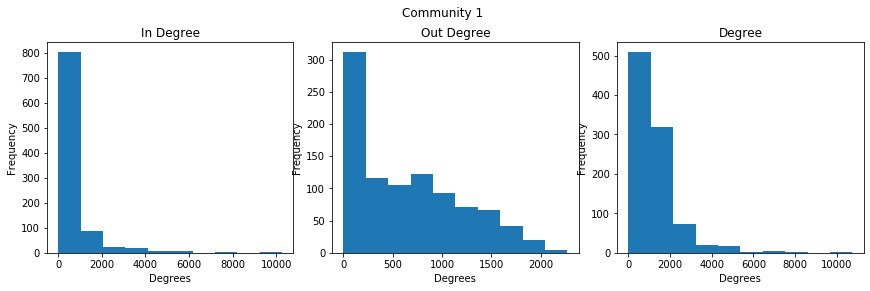

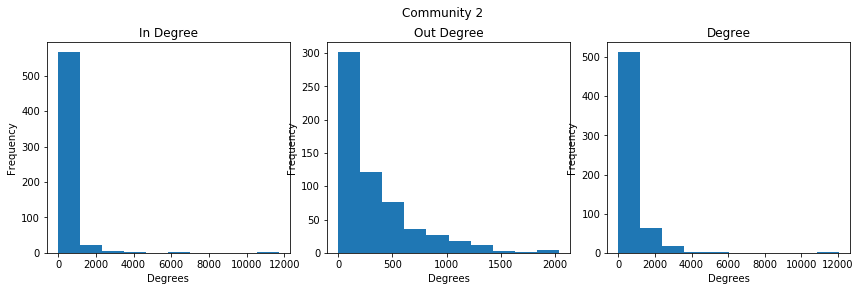

In [521]:
plot_degree_hists(G_core_multi_di)

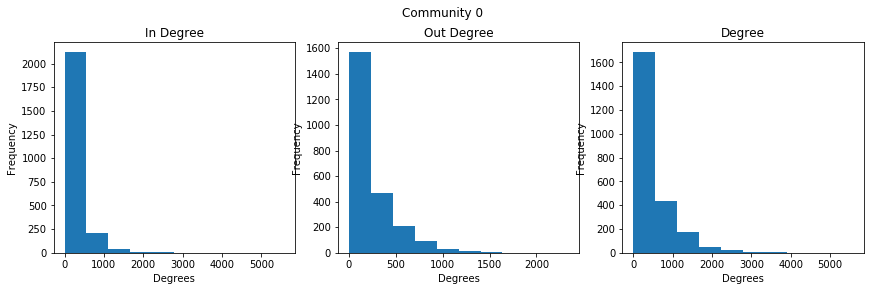

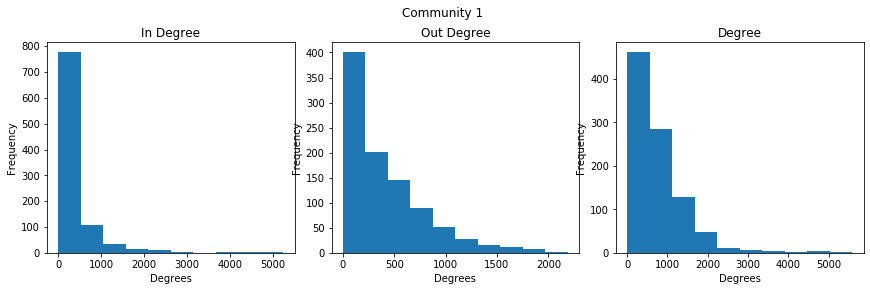

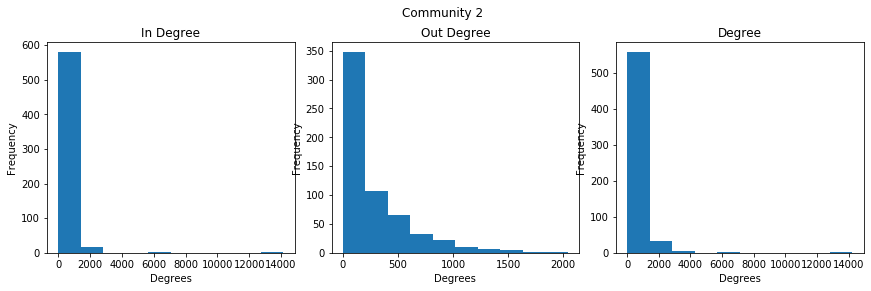

In [522]:
plot_degree_hists(H_core_multi_di)

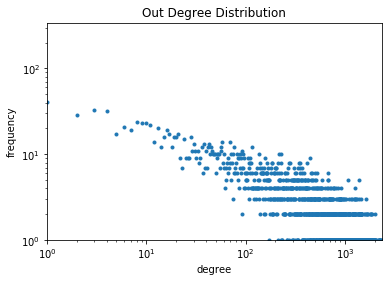

In [408]:
degrees = G_core_multi_di.out_degree()
plot_degree_dist(degrees, "Out Degree")

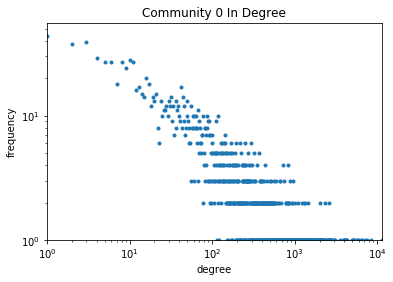

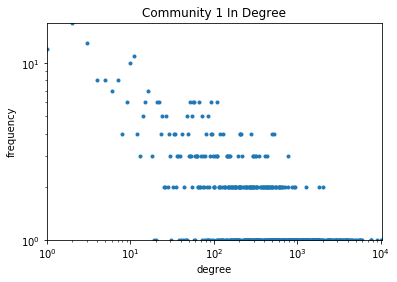

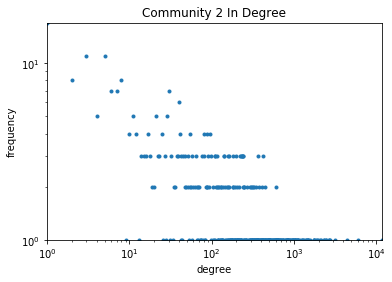

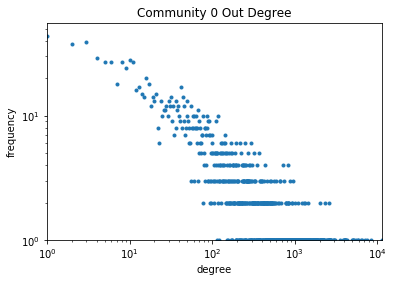

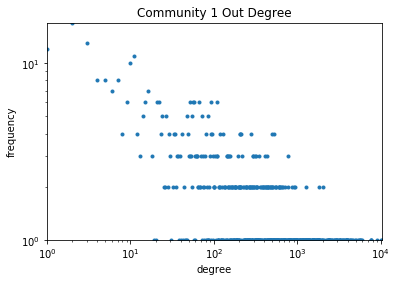

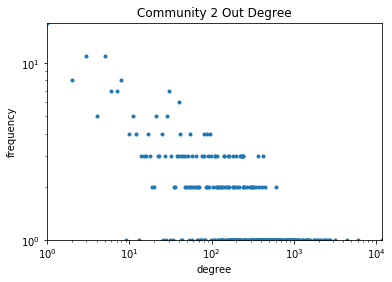

In [443]:
degrees = G_core_multi_di.in_degree()


plot_degree_dist(comm_0, "Community 0 In Degree")

plot_degree_dist(comm_1, "Community 1 In Degree")

plot_degree_dist(comm_2, "Community 2 In Degree")


degrees = G_core_multi_di.in_degree()

plot_degree_dist(comm_0, "Community 0 Out Degree")

plot_degree_dist(comm_1, "Community 1 Out Degree")

plot_degree_dist(comm_2, "Community 2 Out Degree")

## Plotting CDF

In [258]:
def plot_communities(data, string):
    fig, ax = plt.subplots()
    for i in sorted(data):
        if i < 3:
            counts = np.arange(0, len(data[i]))
            ax.plot(data[i], counts, label = 'Community ' + str(i))
            
    ax.legend(loc = 'upper left')
    plt.title(string)
    plt.show()

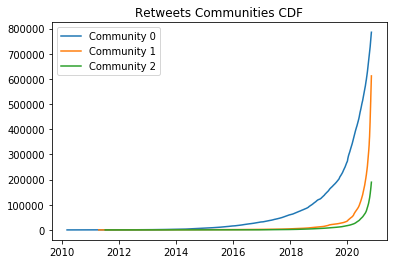

In [262]:
plot_communities(retweets_comm, "Retweets Communities CDF")

In [251]:
replies_comm = sort_community(replies_time, 'Reply Community')

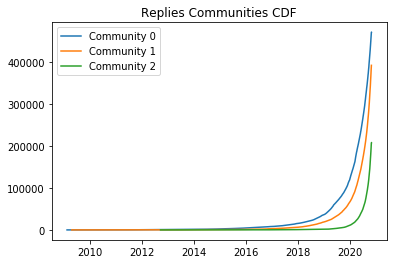

In [261]:
plot_communities(replies_comm, "Replies Communities CDF")